In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import logging
import cartopy.crs as ccrs
import metpy  # accessor needed to parse crs
import calendar
import argparse
import seaborn as sns
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import glob
import fnmatch
import os

In [2]:
output_col_names = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']

In [13]:
mn = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/historical_run/var_out/VEGC.csv7518'
                ,names = output_col_names)
mn = mn.loc[((mn['lat']==46) & (mn['lon']==-94.5))]

In [16]:

###running mn grid individually

mn = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/mn_var_out/GPP.csv0'
                  ,names = output_col_names)

In [14]:
mn

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
28773762,-94.5,46.0,VEGC,1,3000,4,4,4,4,54.79,...,6974.41,6984.45,7016.41,7022.72,6951.32,6953.28,6942.52,6930.40,6920.81,United_States_of_America
28773763,-94.5,46.0,VEGC,2,1,51,51,51,18,54.79,...,110.57,159.06,200.47,166.59,119.22,95.17,80.38,79.06,77.81,United_States_of_America
28773764,-94.5,46.0,VEGC,1,3000,4,4,4,4,54.79,...,6893.77,6907.47,6940.07,6963.21,6983.84,6991.60,6982.77,6970.35,6958.37,United_States_of_America
28773765,-94.5,46.0,VEGC,2,2,51,51,51,18,54.79,...,73.40,117.06,222.54,316.83,358.95,401.14,406.41,395.48,385.09,United_States_of_America
28773766,-94.5,46.0,VEGC,1,3000,4,4,4,4,54.79,...,6916.84,6939.66,6984.67,7013.60,7051.35,7065.77,7051.29,7034.97,7020.98,United_States_of_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28841880,-94.5,46.0,VEGC,596,1,4,51,51,18,54.79,...,4.13,5.50,7.78,10.79,13.28,12.78,11.87,11.56,11.26,United_States_of_America
28841881,-94.5,46.0,VEGC,597,1,4,48,48,17,54.79,...,3.35,4.27,6.87,11.63,18.01,18.09,17.30,17.30,17.30,United_States_of_America
28841882,-94.5,46.0,VEGC,598,0,4,4,4,4,54.79,...,0.69,1.26,1.61,1.70,2.06,2.01,1.91,1.84,1.78,United_States_of_America
28841883,-94.5,46.0,VEGC,599,0,4,51,51,18,54.79,...,3.36,3.48,3.30,2.92,2.87,2.95,2.95,3.00,3.00,United_States_of_America


In [8]:
mn.loc[mn['monthly_mean']>100000000,['cohort_number', 'year', 'current_veg', 'stand_age'] ]

,cohort_number,year,current_veg,stand_age
40159,138,1962,4,0
42069,141,1966,4,0


In [17]:
mn.loc[(mn['cohort_number'] == 138)
      &(mn['year']==1962)]

# mn.loc[(mn['cohort_number'] == 141)
#       &(mn['year']==1966)]

####send to ben just this gridcell (and one for the amazon)
####look at the components of veg c to see what is making it spike

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
40159,-94.5,46.0,GPP,138,0,4,4,4,4,54.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United_States_of_America


In [18]:
mn.loc[40159]
# mn.loc[42069]



lon                                    -94.5
lat                                     46.0
variable                                GPP 
cohort_number                            138
stand_age                                  0
potential_veg                              4
current_veg                                4
subtype                                    4
community_type                             4
silt_clay                              54.79
lc_state                                   0
land_area                               2137
cohort_area                                1
year                                    1962
annual_sum                               0.0
monthly_maximum                          0.0
monthly_mean                             0.0
monthly_minimum                          0.0
Jan                                      0.0
Feb                                      0.0
Mar                                      0.0
Apr                                      0.0
May       

In [8]:
tt = mn.groupby(['cohort_number'])['monthly_mean'].max().reset_index()

<Axes: xlabel='year'>

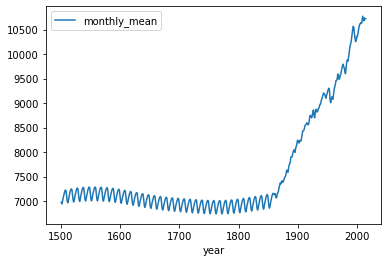

In [29]:
mn.loc[mn['cohort_number']==1].plot(x = 'year', y = 'monthly_mean')

<Axes: xlabel='year'>

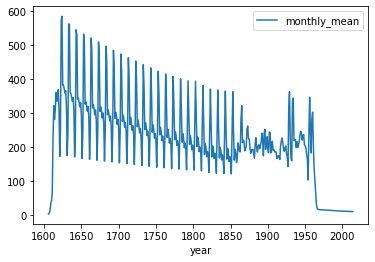

In [33]:
mn.loc[mn['cohort_number']==3].plot(x = 'year', y = 'monthly_mean')

In [32]:
mn.loc[mn['potential_veg']==4, 'cohort_number'].unique()

array([  1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [28]:
mn.loc[(mn['year']==1961)&(mn['current_veg']==4), ['cohort_number'
,'stand_age'
,'current_veg'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec']]

,cohort_number,stand_age,current_veg,cohort_area,year,annual_sum,monthly_maximum,monthly_mean,monthly_minimum,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
28813311,1,3000,4,234,1961,111506.8,9410.1,9292.23,9177.6,9208.86,...,9177.56,9196.21,9262.75,9334.54,9385.30,9410.08,9378.08,9345.84,9318.96,9297.14
28813435,125,11,4,1,1961,16.8,1.8,1.40,1.1,1.20,...,1.06,1.17,1.47,1.68,1.76,1.77,1.59,1.44,1.31,1.21
28813438,128,9,4,2,1961,16.9,1.8,1.41,1.1,1.21,...,1.07,1.17,1.48,1.69,1.77,1.77,1.60,1.44,1.32,1.22
28813441,131,6,4,2,1961,16.9,1.8,1.41,1.1,1.21,...,1.07,1.18,1.48,1.70,1.78,1.78,1.61,1.46,1.33,1.24
28813444,134,4,4,2,1961,16.2,1.7,1.35,1.0,1.15,...,1.01,1.12,1.42,1.64,1.72,1.73,1.55,1.40,1.27,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813777,467,1,4,5,1961,44.9,5.6,3.74,1.8,1.87,...,1.82,2.04,2.77,3.73,4.74,5.60,5.46,5.20,4.98,4.82
28813779,469,1,4,4,1961,3763.2,398.0,313.60,222.3,228.07,...,222.30,233.30,273.75,322.38,366.64,398.01,389.16,377.72,368.02,360.29
28813780,470,0,4,4,1961,15.1,2.2,1.26,0.0,0.00,...,0.06,0.35,0.96,1.44,1.89,2.24,2.18,2.08,1.99,1.92
28813781,471,0,4,1,1961,26.1,2.3,2.18,1.8,2.28,...,2.27,2.25,1.96,1.91,1.82,2.24,2.27,2.27,2.28,2.28


In [23]:
nfert = pd.read_csv('~/TEM/TEM_input_files/global_runs/atm_chem_data/Nfer_crop.csv', names = 
                  ["lon", 'lat','year', 'val'])

In [24]:
nfert.loc[(nfert['lon'] == -94.5 )
          & (nfert['lat'] == 46 )]

,lon,lat,year,val
4927200,-94.5,46.0,1500,0.0000
4927201,-94.5,46.0,1501,0.0000
4927202,-94.5,46.0,1502,0.0000
4927203,-94.5,46.0,1503,0.0000
4927204,-94.5,46.0,1504,0.0000
...,...,...,...,...
4927795,-94.5,46.0,2095,8126.8772
4927796,-94.5,46.0,2096,8126.8772
4927797,-94.5,46.0,2097,8126.8772
4927798,-94.5,46.0,2098,8126.8772


<Axes: xlabel='year'>

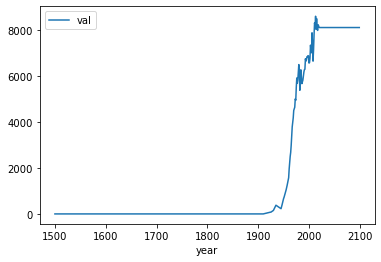

In [25]:
nfert.loc[(nfert['lon'] == -94.5 )
          & (nfert['lat'] == 46 )].plot(x = 'year', y = 'val')

<Axes: xlabel='year'>

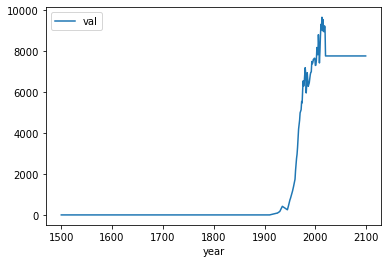

In [26]:
nfert.loc[(nfert['lon'] == -94.5 )
          & (nfert['lat'] == 47 )].plot(x = 'year', y = 'val')